Import Library

In [13]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [5]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Define Semesta

In [19]:
suhu_udara = ctrl.Antecedent(np.arange(0, 38, 1), 'Suhu Udara')
kelembaban = ctrl.Antecedent(np.arange(0, 71,1), 'Kelembaban Tanah')
durasi = ctrl.Consequent(np.arange(0,91,1),'Durasi Penyiraman')

membership function

In [27]:
suhu_udara['cool'] = fuzz.trimf(suhu_udara.universe, [0, 7.5, 15])
suhu_udara['normal'] = fuzz.trimf(suhu_udara.universe, [11, 18.5, 26])
suhu_udara['hot'] = fuzz.trimf(suhu_udara.universe, [22, 29.5, 37])

In [20]:
kelembaban['dry'] = fuzz.trimf(kelembaban.universe, [0, 10, 20])
kelembaban['moist'] = fuzz.trimf(kelembaban.universe, [15, 32.5, 50])
kelembaban['wet'] = fuzz.trimf(kelembaban.universe, [40, 55, 70])

In [40]:
durasi['short'] = fuzz.trimf(durasi.universe, [0, 14, 28])
durasi['medium'] = fuzz.trimf(durasi.universe, [20, 34, 48])
durasi['long '] = fuzz.trimf(durasi.universe, [40, 65, 90])

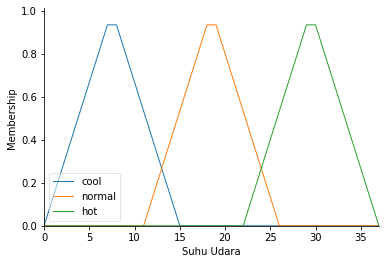

In [28]:
suhu_udara.view ()

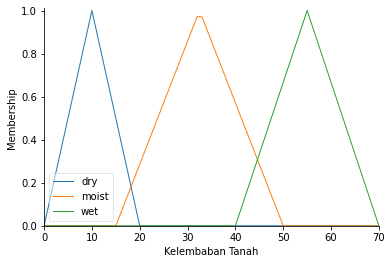

In [23]:
kelembaban.view ()

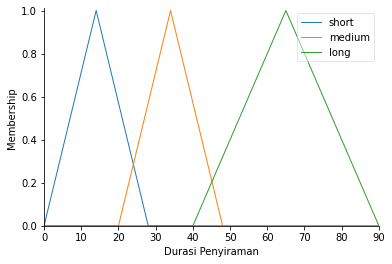

In [25]:
durasi.view ()

define rule

In [52]:
rule1 = ctrl.Rule(suhu_udara['hot'] & kelembaban['dry'], durasi['medium'])
rule2 = ctrl.Rule(suhu_udara['hot'] & kelembaban['moist'], durasi['medium'])
rule3 = ctrl.Rule(suhu_udara['normal'] & kelembaban['dry'], durasi['medium'])
rule4 = ctrl.Rule(suhu_udara['normal'] & kelembaban['moist'], durasi['medium'])

In [42]:
penyiraman_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4])

In [43]:
durasi_penyiraman = ctrl.ControlSystemSimulation(penyiraman_ctrl)

In [55]:
durasi_penyiraman.input('Suhu Udara') = 35
durasi_penyiraman.input('Kelembaban Tanah') = 17

SyntaxError: ignored

In [48]:
print(durasi_penyiraman.output['Durasi Penyiraman'])
durasi.view(sim=durasi_penyiraman)

KeyError: ignored